In [535]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pathlib


In [536]:
pathToData="H:\Programmieren\CSE\DatenorientierteProgrammierParadigmen\DOPP_project\dopp_proj\DataSets"

In [537]:
countries=[
    "Canada", "Mexico", "US", "Total North America", 
    "Argentina", "Brazil", "Chile", "Colombia", "Ecuador", "Peru", "Venezuela", "Total S. & Cent. America",
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", 
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Iceland", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Netherlands", 
    "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Slovakia", 
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom",
    "Other Europe", "Total Europe",
    "Azerbaijan", "Belarus", "Kazakhstan", "Russian Federation", "Turkmenistan", "USSR", 
    "Uzbekistan", "Other CIS", "Total CIS",
    "Iran", "Iraq", "Israel", "Kuwait", "Oman", "Qatar", "Saudi Arabia", "United Arab Emirates",
    "Other Middle East", "Total Middle East", 
    "Algeria", "Egypt", "Morocco", "South Africa", "Eastern Africa", "Middle Africa", "Western Africa",
    "Other Northern Africa", "Other Southern Africa", "Total Africa", 
    "Australia", "Bangladesh", "China", "China Hong Kong SAR", "India", "Indonesia", "Japan", "Malaysia", 
    "New Zealand", "Pakistan", "Philippines", "Singapore", "South Korea", "Sri Lanka", "Taiwan", "Thailand", 
    "Vietnam", "Total Asia Pacific"
]

countriesNA=["Canada", "Mexico", "US", "Total North America"]
countriesEU=["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", 
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Iceland", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Netherlands", 
    "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Slovakia", 
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom",
    "Other Europe", "Total Europe"]
countriesCIS=["Azerbaijan", "Belarus", "Kazakhstan", "Russian Federation", "Turkmenistan", "USSR", 
    "Uzbekistan", "Other CIS", "Total CIS"]
countriesME=["Iran", "Iraq", "Israel", "Kuwait", "Oman", "Qatar", "Saudi Arabia", "United Arab Emirates",
    "Other Middle East", "Total Middle East"]
countriesAf=["Algeria", "Egypt", "Morocco", "South Africa", "Eastern Africa", "Middle Africa", "Western Africa",
    "Other Northern Africa", "Other Southern Africa", "Total Africa"]
countriesAP=["Australia", "Bangladesh", "China", "China Hong Kong SAR", "India", "Indonesia", "Japan", "Malaysia", 
    "New Zealand", "Pakistan", "Philippines", "Singapore", "South Korea", "Sri Lanka", "Taiwan", "Thailand", 
    "Vietnam", "Total Asia Pacific"]


In [538]:
def load_NuclearGenData(filepath, countries):
    df=pd.read_excel(os.path.join(filepath, "bp-stats-review-2022-all-data.xlsx"), sheet_name="Nuclear Generation - TWh", header=2)
    df=df.rename(columns={"Terawatt-hours": "country"})
    
    df=df.set_index("country")
    df=df.loc[countries]
    df=df.loc[:, 1965:2021]
    df=df.stack()
    df=df.to_frame()
    df=df.rename(columns={df.columns[0]: 'Nuclear Generation - TWh'})
    df.index.set_names(["country", "Year"], inplace=True)
    df=df.fillna(0.0)
    
    return df

In [539]:
def load_gdpData(filepath, countries):
    print(filepath)
    df=pd.read_csv(os.path.join(filepath, "GDP.csv"), sep=",", header=2)
    df=df.rename(columns={"Country Name": "country"})
    df=df.set_index("country")

    df=df.iloc[:,8:-1]
    
    df=df.rename(index={"United States": "US", "Venezuela, RB": "Venezuela", "Czechia": "Czech Republic", "Slovak Republic": "Slovakia", 
            "Turkiye": "Turkey", "Iran, Islamic Rep.": "Iran", "Egypt, Arab Rep.": "Egypt", "Korea, Rep.": "South Korea"})
    cntries=[cntry for cntry in countries if cntry in df.index]
    #print([cntry for cntry in countries if cntry in df.index])
    #print([cntry for cntry in countries if cntry not in df.index])
    df=df.loc[cntries]
    df=df.rename(columns={cols:int(cols) for cols in df.columns})
    df=df.stack()
    df=df.to_frame()
    df=df.rename(columns={df.columns[0]: "GDP"})
    df.index.set_names(["country", "Year"], inplace=True)
    #print(df)
    return df

In [540]:
def load_popRedData(filepath, countries):
    df=pd.read_csv(os.path.join(filepath, "PopReduced.csv"), sep=",", header=0)
    df=df.set_index(["country", "Year"])
    df=df.rename(index={"United States": "US", 'United States of America': "US", "Venezuela, RB": "Venezuela",  'Venezuela (Bolivarian Republic of)': "Venezuela", "Czechia": "Czech Republic", "Slovak Republic": "Slovakia", 
            "Turkiye": "Turkey", 'Türkiye': "Turkey", "Iran, Islamic Rep.": "Iran", 'Iran (Islamic Republic of)': "Iran", "Egypt, Arab Rep.": "Egypt", 
            "Korea, Rep.": "South Korea", 'Republic of Korea': "South Korea", 'Viet Nam': "Vietnam"})
    df=df.rename(columns={"Total Population, as of 1 January (thousands)": "Population", "Life Expectancy at Birth, both sexes (years)": "Life Expectancy"})
    cntries=list(set(cntry[0] for cntry in df.index if cntry[0] in countries))
    df["Life Expectancy"]=pd.to_numeric(df["Life Expectancy"], errors="coerce")
    df=df.drop(columns=["ISO3 Alpha-code"])
    
    df=df.loc[cntries]
    return df

In [541]:
def load_CoalCons(filepath, countries):
    df=pd.read_excel(os.path.join(filepath, "bp-stats-review-2022-all-data.xlsx"), sheet_name="Coal Consumption - EJ", header=2)
    df=df.rename(columns={"Exajoules": "country"})
    
    df=df.set_index("country")
    df=df.loc[countries]
    df=df.loc[:, 1965:2021]
    df=df.stack()
    df=df.to_frame()
    df=df.rename(columns={df.columns[0]: "Coal consumption - EJ"})
    df.index.set_names(["country", "Year"], inplace=True)
    df=df.fillna(0.0)
    
    return df

In [542]:
df_Nuclear=load_NuclearGenData(pathToData, countries)
df_GDP=load_gdpData(pathToData, countries)
df_Pop=load_popRedData(pathToData, countries)
df_coal=load_CoalCons(pathToData, countries)

H:\Programmieren\CSE\DatenorientierteProgrammierParadigmen\DOPP_project\dopp_proj\DataSets


In [543]:
df_Nuclear

Nuclear Generation - TWh
country            Year                          
Canada             1965                  0.128000
                   1966                  0.172000
                   1967                  0.153000
                   1968                  0.918000
                   1969                  0.529000
...                                           ...
Total Asia Pacific 2017                493.577101
                   2018                553.588978
                   2019                646.914798
                   2020                654.986368
                   2021                714.297110

[5358 rows x 1 columns]

Text(0, 0.5, 'TWh')

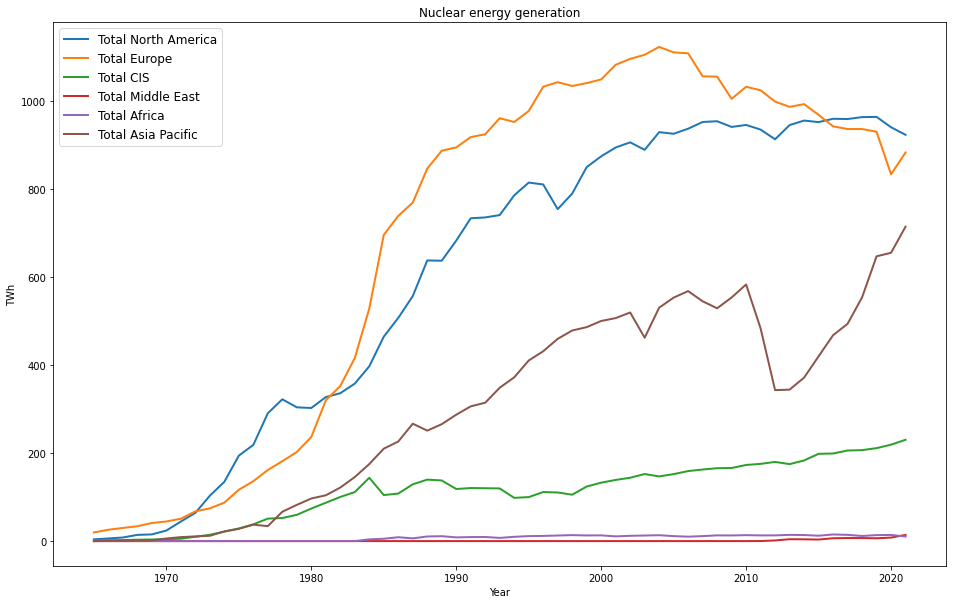

In [544]:
fig, axF = plt.subplots()
for cntry in ["Total North America", "Total Europe", "Total CIS", "Total Middle East", "Total Africa", "Total Asia Pacific"]:
    df_Nuclear.loc[cntry].plot(ax=axF, linewidth=2, figsize=(16,10), label=cntry)
#ax.vlines(2011, -50, 1250, color="grey", linestyle="--", label="Fukushima")
#ax.vlines(1986, -50, 1250, color="grey", linestyle="--", label="Chernobyl")
axF.legend([axF.get_lines()[0], axF.get_lines()[1], axF.get_lines()[2], axF.get_lines()[3], axF.get_lines()[4], axF.get_lines()[5]], 
        ["Total North America", "Total Europe", "Total CIS", "Total Middle East", "Total Africa", "Total Asia Pacific"], fontsize=12)
axF.set_title("Nuclear energy generation")
axF.set_xlabel("Year")
axF.set_ylabel("TWh")


In [545]:
cntries=list(set(cnt[0] for cnt in df_GDP.index).intersection(set(cnt[0] for cnt in df_Nuclear.index)))
#print(cntries)

In [546]:
#df_NukeGDP=pd.concat([df_Nuclear.loc[cntries], df_GDP, df_Pop], axis=1)
#df_NukeGDP=df_NukeGDP.rename(columns={0: "Nuclear Generation TWh", 1: "GDP"})
df=pd.concat([df_Pop, df_GDP, df_Nuclear.loc[cntries]], axis=1)
df

Population  Life Expectancy           GDP  \
country Year                                              
Denmark 1950    4251.526           70.308           NaN   
        1951    4283.862           70.924           NaN   
        1952    4315.296           70.759           NaN   
        1953    4346.217           71.172           NaN   
        1954    4378.749           71.339           NaN   
...                  ...              ...           ...   
Mexico  2017  122210.952           74.138  1.158913e+12   
        2018  123467.563           74.015  1.222408e+12   
        2019  124560.160           74.202  1.269404e+12   
        2020  125610.461           70.133  1.087118e+12   
        2021  126386.142           70.213  1.293038e+12   

              Nuclear Generation - TWh  
country Year                            
Denmark 1950                       NaN  
        1951                       NaN  
        1952                       NaN  
        1953                       NaN  
        1954                       NaN  
...                                ...  
Mexico  2017                 10.882862  
        2018                 13.554877  
        2019                 11.189830  
        2020                 11.177935  
        2021                 11.923092  

[5472 rows x 4 columns]

In [489]:
df2=df.dropna()
#print(sorted(list(set(cntry[0] for cntry in df2.index))))
df2["GDP per capita"]=df2["GDP"]/(1000*df2["Population"])
df2["NuclearPower per capita kWh/Person"]=1000000000*df2["Nuclear Generation - TWh"]/(1000*df2["Population"])
df2["GDPpc diff"]=df2["GDP per capita"].diff().fillna(0.0)


<ipython-input-489-e91be3498436>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["GDP per capita"]=df2["GDP"]/(1000*df2["Population"])
<ipython-input-489-e91be3498436>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["NuclearPower per capita kWh/Person"]=1000000000*df2["Nuclear Generation - TWh"]/(1000*df2["Population"])
<ipython-input-489-e91be3498436>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

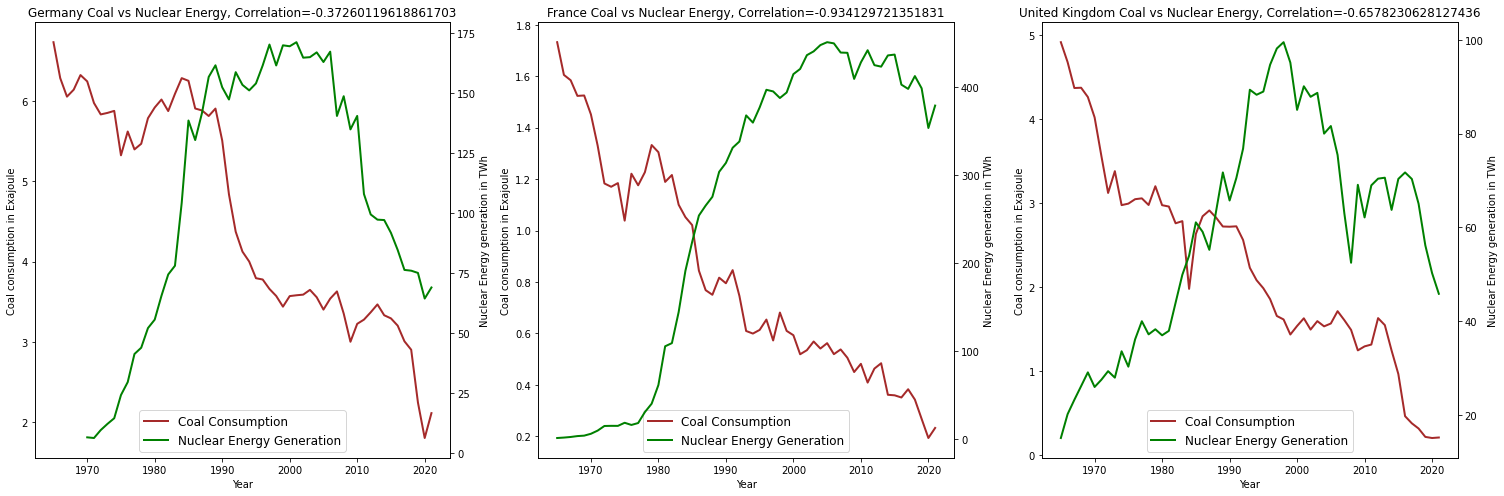

In [511]:
fig, axF2 = plt.subplots(1, 3, figsize=(21,7))
for i, cntry in enumerate(["Germany", "France", "United Kingdom"]):
    axF2[i].plot(df_coal.loc[cntry]["Coal consumption - EJ"], linewidth=2, color="brown", label="Coal Consumption")
    axF3=axF2[i].twinx()
    axF3.plot(df2.loc[cntry]["Nuclear Generation - TWh"], linewidth=2, color="green", label="Nuclear Energy Generation")
    axF2[i].set_title(cntry+ " Coal vs Nuclear Energy, Correlation="+str(df_coal.loc[cntry].corrwith(df2.loc[cntry]["Nuclear Generation - TWh"])["Coal consumption - EJ"]))
    axF2[i].set_xlabel("Year")
    axF2[i].set_ylabel("Coal consumption in Exajoule")
    axF3.set_ylabel("Nuclear Energy generation in TWh")
    axF2[i].legend([axF2[i].get_lines()[0], axF3.get_lines()[0]], ["Coal Consumption", "Nuclear Energy Generation"], fontsize=12, loc="lower center")
    str(df_coal.loc[cntry].corrwith(df2.loc[cntry]["Nuclear Generation - TWh"])["Coal consumption - EJ"])
    plt.tight_layout()

In [491]:
df_coal["Coal consumption - EJ diff"]=df_coal["Coal consumption - EJ"].diff().fillna(0.0)

In [515]:
for i, cntry in enumerate(cntries):
    if df2.loc[cntry]["Nuclear Generation - TWh"].mean()>0:
        print(cntry+" " + str(df_coal.loc[cntry].corrwith(df2.loc[cntry]["Nuclear Generation - TWh"])["Coal consumption - EJ"]))

Kazakhstan 0.11991557038485466
Italy -0.07103982220760367
Brazil 0.8208616267669289
Pakistan 0.9419354594575022
China 0.8021488417050149
Belarus -0.11636309437806779
South Korea 0.9594745064060388
Switzerland -0.9036942486124223
Lithuania -0.3255763967901959
Netherlands 0.19878433671819504
Slovakia -0.5816879036726003
Sweden 0.6872836812209164
Germany -0.37260119618861703
South Africa 0.937600341639844
Czech Republic -0.7936418446897082
Iran 0.5302374795843455
Belgium -0.7483987056443849
United Kingdom -0.6578230628127436
India 0.9797590508074631
Ukraine -0.6296947985451675
France -0.934129721351831
Japan 0.3331778808409751
US 0.6251672361709408
Romania -0.7861233454810908
Slovenia -0.2706765427937213
Bulgaria -0.529521075128551
United Arab Emirates 0.3044460824420492
Finland 0.7193321528083139
Argentina 0.16284394178158695
Hungary -0.6748439942897326
Spain 0.42335643611643237
Canada 0.46060322439498835
Russian Federation -0.5737166828736645
Mexico 0.8632558819164059


In [534]:
for i, cntry in enumerate(cntries):
    if df2.loc[cntry]["Nuclear Generation - TWh"].mean()>0:
        print(cntry+" correlation with Nuclear: " + str(df2.loc[cntry].corrwith(df2.loc[cntry]["Nuclear Generation - TWh"])["GDP"]))
        print(cntry+" correlation with Time: " + str(df2.loc[cntry].corrwith(df2.loc[cntry].index.to_series())["GDP"]))
  #  else:
  #      print(cntry+" correlation with Time: " + str(df2.loc[cntry].corrwith(df2.loc[cntry].index.to_series())["GDP"]))

Kazakhstan correlation with Nuclear: -0.4556992033909002
Kazakhstan correlation with Time: 0.8870149282241754
Italy correlation with Nuclear: -0.7150914655260591
Italy correlation with Time: 0.9606502189540667
Brazil correlation with Nuclear: 0.8805421482432503
Brazil correlation with Time: 0.8715058892785695
Pakistan correlation with Nuclear: 0.9003062044106294
Pakistan correlation with Time: 0.8900907712836913
China correlation with Nuclear: 0.9644912717795537
China correlation with Time: 0.8005769949558075
Belarus correlation with Nuclear: 0.2510267408551718
Belarus correlation with Time: 0.8732324922945779
South Korea correlation with Nuclear: 0.9332860459974958
South Korea correlation with Time: 0.9447561335742642
Switzerland correlation with Nuclear: 0.5998034850201147
Switzerland correlation with Time: 0.9545778177479177
Lithuania correlation with Nuclear: -0.8183582772737725
Lithuania correlation with Time: 0.9624734898224369
Netherlands correlation with Nuclear: 0.542989920845

In [529]:
df2.loc[cntry].corrwith(df2.loc[cntry].index.to_series())["GDP"]

0.9583421211616538

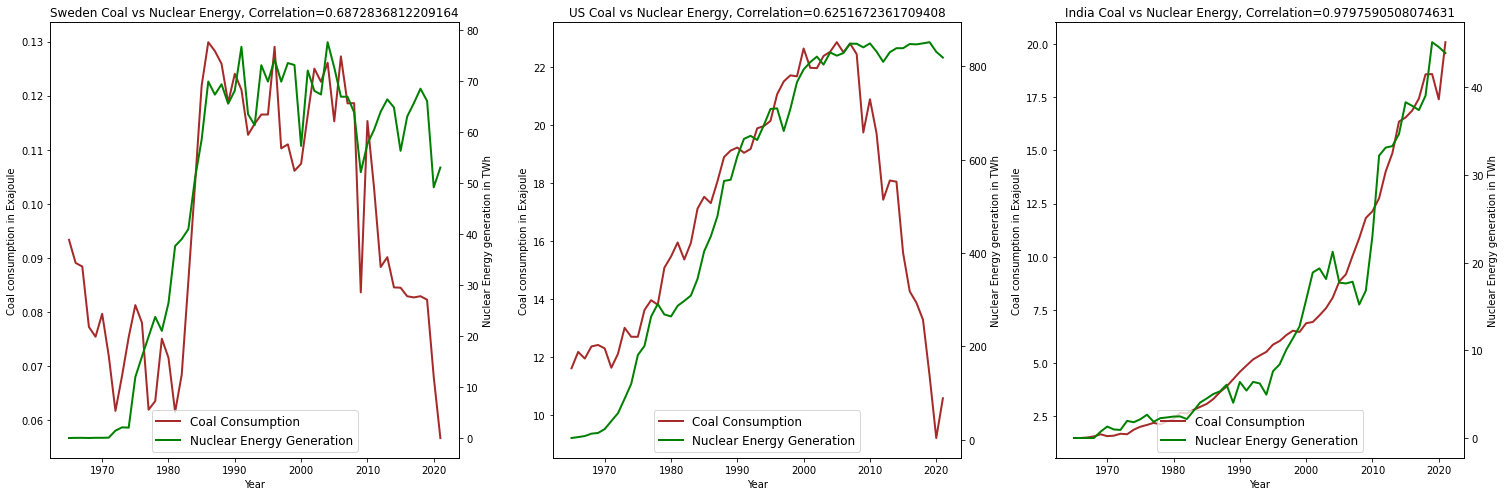

In [516]:
fig, axF2b = plt.subplots(1, 3, figsize=(21,7))
for i, cntry in enumerate(["Sweden", "US", "India"]):
    axF2b[i].plot(df_coal.loc[cntry]["Coal consumption - EJ"], linewidth=2, color="brown", label="Coal Consumption")
    axF3b=axF2b[i].twinx()
    axF3b.plot(df2.loc[cntry]["Nuclear Generation - TWh"], linewidth=2, color="green", label="Nuclear Energy Generation")
    axF2b[i].set_title(cntry+ " Coal vs Nuclear Energy, Correlation="+str(df_coal.loc[cntry].corrwith(df2.loc[cntry]["Nuclear Generation - TWh"])["Coal consumption - EJ"]))
    axF2b[i].set_xlabel("Year")
    axF2b[i].set_ylabel("Coal consumption in Exajoule")
    axF3b.set_ylabel("Nuclear Energy generation in TWh")
    axF2b[i].legend([axF2[i].get_lines()[0], axF3.get_lines()[0]], ["Coal Consumption", "Nuclear Energy Generation"], fontsize=12, loc="lower center")
    str(df_coal.loc[cntry].corrwith(df2.loc[cntry]["Nuclear Generation - TWh"])["Coal consumption - EJ"])
    plt.tight_layout()

In [388]:

df2


Population  Life Expectancy           GDP  \
country Year                                              
Denmark 1966    4776.023           72.466  1.193174e+10   
        1967    4816.783           72.954  1.305906e+10   
        1968    4852.678           73.146  1.350557e+10   
        1969    4882.790           73.243  1.541490e+10   
        1970    4909.524           73.364  1.707546e+10   
...                  ...              ...           ...   
Mexico  2017  122210.952           74.138  1.158913e+12   
        2018  123467.563           74.015  1.222408e+12   
        2019  124560.160           74.202  1.269404e+12   
        2020  125610.461           70.133  1.087118e+12   
        2021  126386.142           70.213  1.293038e+12   

              Nuclear Generation - TWh  GDP per capita  \
country Year                                             
Denmark 1966                  0.000000     2498.258459   
        1967                  0.000000     2711.158957   
        1968                  0.000000     2783.117665   
        1969                  0.000000     3156.986532   
        1970                  0.000000     3478.027116   
...                                ...             ...   
Mexico  2017                 10.882862     9482.890173   
        2018                 13.554877     9900.642512   
        2019                 11.189830    10191.093820   
        2020                 11.177935     8654.675530   
        2021                 11.923092    10230.851626   

              NuclearPower per capita kWh/Person   GDPpc diff  
country Year                                                   
Denmark 1966                            0.000000     0.000000  
        1967                            0.000000   212.900498  
        1968                            0.000000    71.958708  
        1969                            0.000000   373.868866  
        1970                            0.000000   321.040585  
...                                          ...          ...  
Mexico  2017                           89.049808   557.018729  
        2018                          109.784927   417.752339  
        2019                           89.834743   290.451308  
        2020                           88.988884 -1536.418290  
        2021                           94.338606  1576.176096  

[3743 rows x 7 columns]

In [308]:
df2.dtypes

Population                          float64
Life Expectancy                     float64
GDP                                 float64
Nuclear Generation - TWh            float64
GDP per capita                      float64
NuclearPower per capita             float64
NuclearPower per capita standard    float64
dtype: object

<AxesSubplot:xlabel='NuclearPower per capita kWh/Person', ylabel='Life Expectancy'>

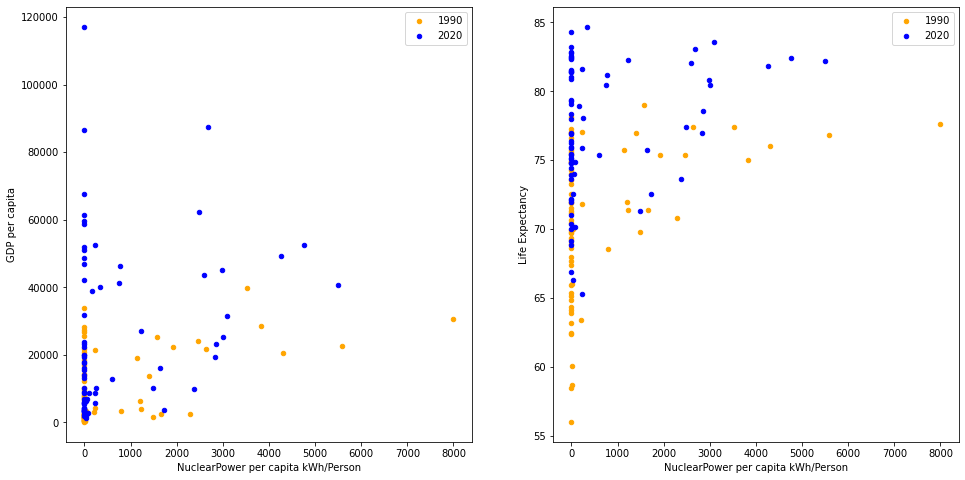

In [357]:
fig, axF4= plt.subplots(1,2)
df2.xs(1990, level="Year").plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF4[0], figsize=(16,8), color="orange", label="1990")
df2.xs(1990, level="Year").plot.scatter(x="NuclearPower per capita kWh/Person", y="Life Expectancy", ax=axF4[1], figsize=(16,8), color="orange", label="1990")
df2.xs(2020, level="Year").plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF4[0], figsize=(16,8), color="blue", label="2020")
df2.xs(2020, level="Year").plot.scatter(x="NuclearPower per capita kWh/Person", y="Life Expectancy", ax=axF4[1], figsize=(16,8), color="blue", label="2020")

<AxesSubplot:xlabel='GDP per capita', ylabel='Life Expectancy'>

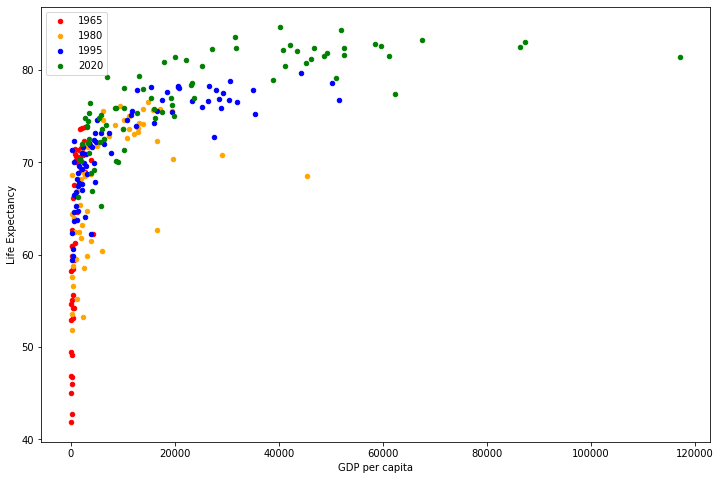

In [323]:
fig, axF5= plt.subplots()
df2.xs(1965, level="Year").plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF5, figsize=(12,8), color="red", label="1965")
df2.xs(1980, level="Year").plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF5, figsize=(12,8), color="orange", label="1980")
df2.xs(1995, level="Year").plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF5, figsize=(12,8), color="blue", label="1995")
df2.xs(2020, level="Year").plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF5, figsize=(12,8), color="green", label="2020")

<AxesSubplot:xlabel='NuclearPower per capita kWh/Person', ylabel='GDP per capita'>

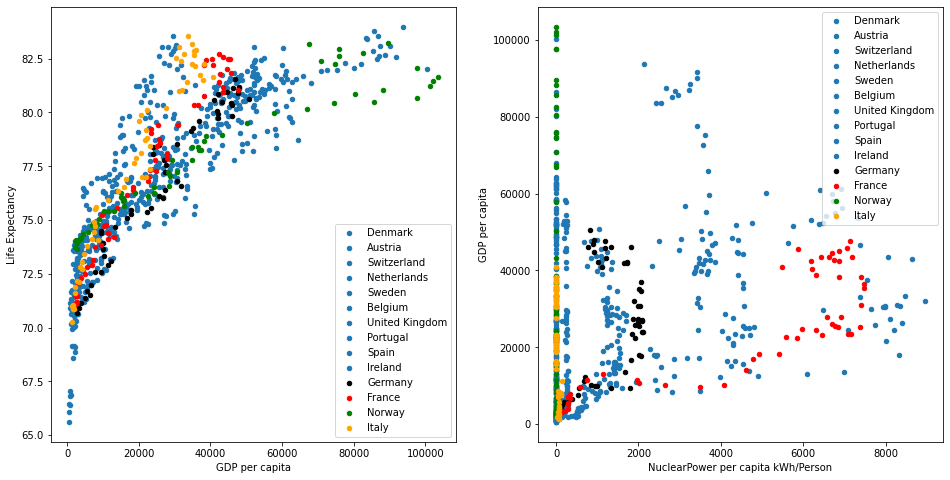

In [380]:
cntriesWest=[c for c in cntries if c in ["Austria", "Belgium", 
    "Denmark", "France", "Germany", "Ireland", "Italy", "Netherlands", 
    "Norway", "Portugal", "Spain", "Sweden", "Switzerland", "United Kingdom"]]

fig, axF6= plt.subplots(1, 2)
for c in cntriesWest:
    if c not in ["France", "Germany", "Norway", "Italy"]: 
        df2.loc[c].plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF6[0], figsize=(16,8), label=c)
df2.loc["Germany"].plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF6[0], color="k", figsize=(16,8), label="Germany")
df2.loc["France"].plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF6[0], color="red", figsize=(16,8), label="France")
df2.loc["Norway"].plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF6[0], color="green", figsize=(16,8), label="Norway")
df2.loc["Italy"].plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF6[0], color="orange", figsize=(16,8), label="Italy")

for c in cntriesWest:
    if c not in ["France", "Germany", "Norway", "Italy"]: 
        df2.loc[c].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF6[1], figsize=(16,8), label=c)
df2.loc["Germany"].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF6[1], color="k", figsize=(16,8), label="Germany")
df2.loc["France"].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF6[1], color="red", figsize=(16,8), label="France")
df2.loc["Norway"].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF6[1], color="green", figsize=(16,8), label="Norway")
df2.loc["Italy"].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF6[1], color="orange", figsize=(16,8), label="Italy")

# 
# df2.xs(1980, level="Year").plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF5, figsize=(12,8), color="orange", label="1980")
# df2.xs(1995, level="Year").plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF5, figsize=(12,8), color="blue", label="1995")
# df2.xs(2020, level="Year").plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF5, figsize=(12,8), color="green", label="2020")

<AxesSubplot:xlabel='NuclearPower per capita kWh/Person', ylabel='GDPpc diff'>

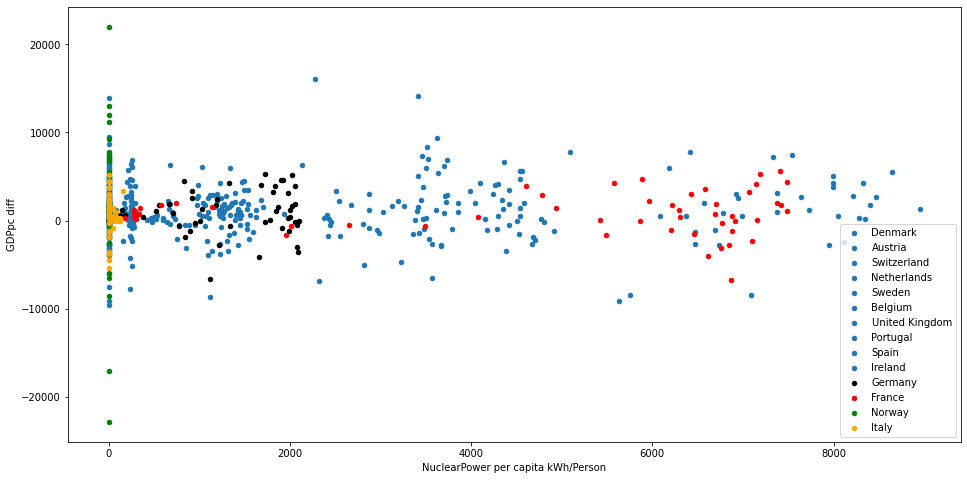

In [412]:
cntriesWest=[c for c in cntries if c in ["Austria", "Belgium", 
    "Denmark", "France", "Germany", "Ireland", "Italy", "Netherlands", 
    "Norway", "Portugal", "Spain", "Sweden", "Switzerland", "United Kingdom"]]

fig, axF7= plt.subplots()
for c in cntriesWest:
    if c not in ["France", "Germany", "Norway", "Italy"]: 
        df2.loc[c][2:].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDPpc diff", ax=axF7, figsize=(16,8), label=c)
df2.loc["Germany"][2:].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDPpc diff", ax=axF7, color="k", figsize=(16,8), label="Germany")
df2.loc["France"][2:].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDPpc diff", ax=axF7, color="red", figsize=(16,8), label="France")
df2.loc["Norway"][2:].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDPpc diff", ax=axF7, color="green", figsize=(16,8), label="Norway")
df2.loc["Italy"][2:].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDPpc diff", ax=axF7, color="orange", figsize=(16,8), label="Italy")

In [553]:
for c in cntriesWest:
    if df2.loc[c]["Nuclear Generation - TWh"].mean()>0:
        print(c+" "+ str(df2.loc[c].corrwith(df2.loc[c]["Nuclear Generation - TWh"])["GDPpc diff"]))

Italy -0.09591081199401254
Switzerland 0.17544167643200997
Netherlands 0.295770007322863
Sweden 0.2414997759860538
Germany 0.2188204985249394
Belgium 0.22587797394023226
United Kingdom 0.2839520734108128
France 0.2123782416465021
Spain 0.23848854639432954


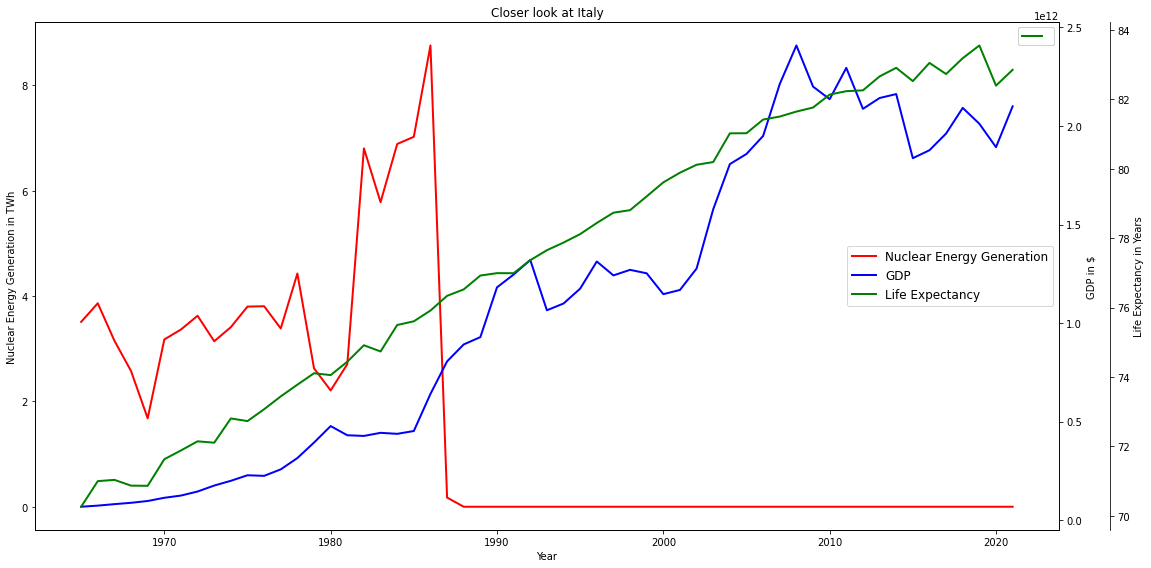

In [517]:
fig, axF8= plt.subplots()
axF9=axF8.twinx()
axF10=axF8.twinx()
axF8.set_title("Closer look at Italy")
axF8.set_ylabel("Nuclear Energy Generation in TWh")
axF9.set_ylabel("GDP in $")
axF10.set_ylabel("Life Expectancy in Years")
axF10.spines.right.set_position(("axes", 1.05))
df2.loc["Italy"].plot(y="Nuclear Generation - TWh", ax=axF8, color="red", linewidth=2, figsize=(16,8), label="")
df2.loc["Italy"].plot(y="GDP", ax=axF9, color="blue", linewidth=2, figsize=(16,8), label="")
df2.loc["Italy"].plot(y="Life Expectancy", ax=axF10, color="green", linewidth=2, figsize=(16,8), label="")
axF8.legend([axF8.get_lines()[0], axF9.get_lines()[0], axF10.get_lines()[0]], ["Nuclear Energy Generation", "GDP", "Life Expectancy"], fontsize=12, loc="center right")
plt.tight_layout()